# **Eye gaze detection** 👀

Project for the *Artificial Intelligence* course at the Faculty of Electrical Engineering, University of Sarajevo

Students:
1.   Dženeta Milić (18856)
2.   Lamija Gutić (18977)
3. Fatima Kaljanac (19191)

Used dataset: [Eye-Tracking Dataset to Support the Research on Autism Spectrum Disorder](https://www.kaggle.com/datasets/imtkaggleteam/eye-tracking-autism)

## 1. 📁 Load the dataset

In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Before running the following cell, be sure to create your kaggle.json file containing an API key  on [kaggle.com](https://https://www.kaggle.com/) that you'll be able to upload into your session files.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d imtkaggleteam/eye-tracking-autism
!unzip eye-tracking-autism.zip -d eye_tracking_data

Dataset URL: https://www.kaggle.com/datasets/imtkaggleteam/eye-tracking-autism
License(s): CC-BY-SA-4.0
 81% 116M/143M [00:00<00:00, 321MB/s] 
100% 143M/143M [00:00<00:00, 350MB/s]
Archive:  eye-tracking-autism.zip
  inflating: eye_tracking_data/Eye-tracking Output/1.csv  
  inflating: eye_tracking_data/Eye-tracking Output/10.csv  
  inflating: eye_tracking_data/Eye-tracking Output/11.csv  
  inflating: eye_tracking_data/Eye-tracking Output/12.csv  
  inflating: eye_tracking_data/Eye-tracking Output/13.csv  
  inflating: eye_tracking_data/Eye-tracking Output/14.csv  
  inflating: eye_tracking_data/Eye-tracking Output/15.csv  
  inflating: eye_tracking_data/Eye-tracking Output/16.csv  
  inflating: eye_tracking_data/Eye-tracking Output/17.csv  
  inflating: eye_tracking_data/Eye-tracking Output/18.csv  
  inflating: eye_tracking_data/Eye-tracking Output/19.csv  
  inflating: eye_tracking_data/Eye-tracking Output/2.csv  
  inflating: eye_tracking_data/Eye-tracking Output/20.csv  
  infla

Concatenate all .csv tracking files

In [ ]:
import glob

csv_files = glob.glob("eye_tracking_data/Eye-tracking Output/*.csv")

df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

eye_data = pd.concat(df_list, ignore_index=True)

print(eye_data.head())
print(eye_data.info())

/tmp/ipython-input-3-793302653.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/tmp/ipython-input-3-793302653.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/tmp/ipython-input-3-793302653.py:7: DtypeWarning: Columns (7,15,16,17,18,19,20,21,22,23,24,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/tmp/ipython-input-3-793302653.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/tmp/ipython-input-3-793302653.py:7: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/tmp/ipython-input-3-793302653.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import 

   Unnamed: 0  RecordingTime [ms] Time of Day [h:m:s:ms]     Trial  \
0           0         3161762.656           10:26:21:037  Trial020   
1           1         3161777.217           10:26:21:052  Trial020   
2           2         3161793.897           10:26:21:068  Trial020   
3           3         3161810.576           10:26:21:085  Trial020   
4           4         3161827.256           10:26:21:102  Trial020   

          Stimulus  Export Start Trial Time [ms]  Export End Trial Time [ms]  \
0  01 neutre22.avi                           0.0                   16432.805   
1  01 neutre22.avi                           0.0                   16432.805   
2  01 neutre22.avi                           0.0                   16432.805   
3  01 neutre22.avi                           0.0                   16432.805   
4  01 neutre22.avi                           0.0                   16432.805   

         Participant Color  Tracking Ratio [%]  ... Scroll Direction X  \
0  Unidentified(Neg)  Cy

Convert the data into necessary numeric format

In [ ]:
columns_to_convert = [
    "Point of Regard Right X [px]",
    "Point of Regard Right Y [px]",
    "Point of Regard Left X [px]",
    "Point of Regard Left Y [px]",
    "Pupil Diameter Right [mm]",
    "Pupil Diameter Left [mm]",
    "RecordingTime [ms]"
]

for col in columns_to_convert:
    eye_data[col] = pd.to_numeric(eye_data[col], errors='coerce')

In [ ]:
eye_data[columns_to_convert].head(30)

,Point of Regard Right X [px],Point of Regard Right Y [px],Point of Regard Left X [px],Point of Regard Left Y [px],Pupil Diameter Right [mm],Pupil Diameter Left [mm],RecordingTime [ms]
0,NaN,NaN,NaN,NaN,NaN,NaN,3161762.656
1,0.0,0.0,0.0,0.0,NaN,NaN,3161777.217
2,0.0,0.0,0.0,0.0,NaN,NaN,3161793.897
3,0.0,0.0,0.0,0.0,NaN,NaN,3161810.576
4,0.0,0.0,0.0,0.0,NaN,NaN,3161827.256
5,0.0,0.0,0.0,0.0,NaN,NaN,3161843.936
6,0.0,0.0,0.0,0.0,NaN,NaN,3161860.615
7,0.0,0.0,0.0,0.0,NaN,NaN,3161877.295
8,0.0,0.0,0.0,0.0,NaN,NaN,3161893.974
9,0.0,0.0,0.0,0.0,NaN,NaN,3161910.654


## 2. 📁 Load the metadata

In [ ]:
meta_df = pd.read_csv("eye_tracking_data/Metadata_Participants.csv")
meta_df.head()

,ParticipantID,Gender,Age,Class,CARS Score
0,1,M,7.0,ASD,32.5
1,2,F,8.9,ASD,36.5
2,3,M,4.4,ASD,27.0
3,4,M,6.9,ASD,35.0
4,5,M,8.9,ASD,31.0


In [ ]:
eye_data['Participant'] = eye_data['Participant'].astype(str)

valid_eye_data = eye_data[~eye_data['Participant'].isin(['Unidentified(Neg)', 'Unidentified(Pos)'])]

print(valid_eye_data['Participant'].unique())

['54' '22' '24' '59' '58' '29' '56' '30' '57' '52' '31' '49' '36' '50'
 '55' '53' '46' '42' '20' '19' '27' '17' '15' '21' '23' '28' '18' '2' '3'
 '4' '5' '6' '1' '9' '10' '8' '34' '40' '38' '32' '35' '11' '33' '39' '37'
 '7' '25' '26' '43' '48' '51' '44' '45' '47' '13' '14' '41']


In [ ]:
meta_df['ParticipantID'] = meta_df['ParticipantID'].astype(str)
print(meta_df['ParticipantID'].unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59']


Merge the data with metadata (class - ASD vs TD)

In [ ]:
eye_data_merged = valid_eye_data.merge(meta_df, left_on='Participant', right_on='ParticipantID', how='left')

In [ ]:
eye_data_merged['AOI Order Right'].dropna()

,AOI Order Right
0,-
1,-
2,-
3,-
4,-
...,...
1351152,-
1351153,-
1351154,-
1351155,-


In [ ]:
eye_data_merged = eye_data_merged.drop('ParticipantID', axis=1)
eye_data_merged[['Participant', 'Class', 'Age', 'Gender']].drop_duplicates()

,Participant,Class,Age,Gender
0,54,TD,3.7,M
980,22,ASD,7.1,M
1965,24,ASD,6.5,F
4879,59,TD,3.7,F
6820,58,TD,12.7,F
7806,29,ASD,4.2,M
8791,56,TD,4.7,M
9777,30,TD,6.7,F
11750,57,TD,8.6,M
12736,52,TD,10.7,M


In [ ]:
eye_data_merged['RecordingTime [ms]'].diff().median()

19.86700000008568

## 3. 🔎 Data preprocessing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def extract_numeric_features(df):
    grouped = df.groupby(['Participant', 'Trial'])

    features = []
    labels = []
    participants = []
    trials = []

    for (participant, trial), group in grouped:
        mean_pupil_right = group['Pupil Diameter Right [mm]'].mean()
        mean_pupil_left = group['Pupil Diameter Left [mm]'].mean()
        tracking_ratio = group['Tracking Ratio [%]'].iloc[0]
        age = group['Age'].iloc[0]
        gender = group['Gender'].iloc[0]
        cars_score = group['CARS Score'].iloc[0] if 'CARS Score' in group else np.nan

        gender_encoded = 0 if gender == 'F' else 1

        label = 1 if group['Class'].iloc[0] == 'ASD' else 0

        feature_vector = [
            mean_pupil_right,
            mean_pupil_left,
            tracking_ratio,
            age,
            gender_encoded,
            cars_score if not pd.isna(cars_score) else 0
        ]

        features.append(feature_vector)
        labels.append(label)
        participants.append(participant)
        trials.append(trial)

    feature_df = pd.DataFrame(features, columns=[
        'mean_pupil_right', 'mean_pupil_left', 'tracking_ratio',
        'age', 'gender', 'cars_score'])

    feature_df['label'] = labels
    feature_df['participant'] = participants
    feature_df['trial'] = trials

    feature_df.fillna(feature_df.mean(), inplace=True)

    scaler = StandardScaler()
    feature_cols = ['mean_pupil_right', 'mean_pupil_left', 'tracking_ratio', 'age', 'gender', 'cars_score']
    feature_df[feature_cols] = scaler.fit_transform(feature_df[feature_cols])

    return feature_df, scaler, feature_cols

## 4. ⌛ Feature extraction

In [ ]:
agg_features_stimulus = eye_data_merged.groupby(['Participant', 'Stimulus']).agg({
    'Pupil Diameter Right [mm]': ['mean', 'std'],
    'Pupil Diameter Left [mm]': ['mean', 'std'],
    'Tracking Ratio [%]': 'mean',
    'Point of Regard Right X [px]': ['mean', 'std'],
    'Point of Regard Right Y [px]': ['mean', 'std'],
    'Point of Regard Left X [px]': ['mean', 'std'],
    'Point of Regard Left Y [px]': ['mean', 'std'],
    'RecordingTime [ms]' : ['mean', 'std']
}).reset_index()

agg_features_stimulus.columns = ['Participant', 'Stimulus'] + ['_'.join(col).strip() for col in agg_features_stimulus.columns[2:]]

participant_labels = eye_data_merged[['Participant', 'Class']].drop_duplicates()
agg_features_stimulus = agg_features_stimulus.merge(participant_labels, on='Participant', how='left')

In [ ]:
agg_features_stimulus_clean = agg_features_stimulus.dropna()

In [ ]:
agg_features_stimulus_clean

,Participant,Stimulus,Pupil Diameter Right [mm]_mean,Pupil Diameter Right [mm]_std,Pupil Diameter Left [mm]_mean,Pupil Diameter Left [mm]_std,Tracking Ratio [%]_mean,Point of Regard Right X [px]_mean,Point of Regard Right X [px]_std,Point of Regard Right Y [px]_mean,Point of Regard Right Y [px]_std,Point of Regard Left X [px]_mean,Point of Regard Left X [px]_std,Point of Regard Left Y [px]_mean,Point of Regard Left Y [px]_std,RecordingTime [ms]_mean,RecordingTime [ms]_std,Class
0,1,1 coucou D.jpg,4.200997,0.148106,4.296911,0.145203,100.0000,728.688228,240.032076,391.638677,39.643290,728.688228,240.032076,391.638677,39.643290,2.787692e+05,846.756419,ASD
2,1,11 yeux chat gauche.jpg,4.655003,0.271775,4.435615,0.382841,47.1406,353.920005,420.505478,239.921499,287.721179,353.920005,420.505478,239.921499,287.721179,3.082809e+05,846.680874,ASD
4,1,12 tete chat gauche.jpg,4.231874,0.340124,4.150392,0.360686,76.4395,742.046546,340.468595,553.588853,246.077904,742.046546,340.468595,553.588853,246.077904,3.114074e+05,763.638227,ASD
6,1,13 tete pointage chat gauche.jpg,4.167518,0.100988,4.200499,0.094693,100.0000,392.091501,185.862111,454.030827,127.049183,392.091501,185.862111,454.030827,127.049183,3.141769e+05,846.738709,ASD
8,1,14 devant point chat gauche.jpg,4.203666,0.080596,4.250073,0.076225,100.0000,521.980492,169.791666,414.732294,36.000529,521.980492,169.791666,414.732294,36.000529,3.171406e+05,846.711513,ASD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,9,6 devant point chien D.jpg,4.268971,0.269099,4.659213,0.216665,6.2371,75.739964,296.553095,66.629453,260.924457,75.739964,296.553095,66.629453,260.924457,1.238302e+06,846.807800,ASD
2364,9,7 devant - Copie.jpg,4.382701,0.231870,4.685690,0.301179,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.241236e+06,841.286942,ASD
2366,9,8 voc chien D.jpg,3.956162,0.155362,4.411373,0.174057,0.6928,8.656149,104.592642,2.417067,29.205533,8.656149,104.592642,2.417067,29.205533,1.244171e+06,846.845820,ASD
2369,9,9 voc devant.jpg,3.923711,0.201592,4.137543,0.117082,2.1343,30.189266,154.161889,43.159659,214.368567,30.189266,154.161889,43.159659,214.368567,1.247260e+06,923.106113,ASD


In [ ]:
agg_features_stimulus_clean['target'] = agg_features_stimulus_clean['Class'].map({'ASD': 1, 'TD': 0})

/tmp/ipython-input-18-2039640045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_features_stimulus_clean['target'] = agg_features_stimulus_clean['Class'].map({'ASD': 1, 'TD': 0})


In [ ]:
eye_data_merged['target'] = eye_data_merged['Class'].map({'ASD': 1, 'TD': 0})

In [ ]:
agg_features_stimulus['target'] = agg_features_stimulus['Class'].map({'ASD': 1, 'TD': 0})

## 5. ➗ Data splitting

In [ ]:
from sklearn.model_selection import GroupShuffleSplit

df = agg_features_stimulus_clean.copy()
groups = df['Participant']
target = df['target']

gss1 = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
trainval_idx, test_idx = next(gss1.split(df, target, groups))

df_trainval = df.iloc[trainval_idx]
df_test = df.iloc[test_idx]

groups_trainval = df_trainval['Participant']
target_trainval = df_trainval['target']

gss2 = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = next(gss2.split(df_trainval, target_trainval, groups_trainval))

df_train = df_trainval.iloc[train_idx]
df_val = df_trainval.iloc[val_idx]

feature_cols = [col for col in df.columns if col not in ['Participant', 'Stimulus', 'Class', 'target']]

X_train = df_train[feature_cols]
y_train = df_train['target']

X_val = df_val[feature_cols]
y_val = df_val['target']

X_test = df_test[feature_cols]
y_test = df_test['target']

## 🌲Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

rf = RandomForestClassifier(random_state=42, n_jobs=-2)

rf.fit(X_train, y_train)

y_val_pred = rf.predict(X_val)

print("Validation Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

y_test_pred = rf.predict(X_test)

print("\nTest Performance (Final Evaluation on Unseen Data):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

joblib.dump(rf, 'rf_model.pkl')

Validation Performance:
Accuracy: 0.8462
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       128
           1       0.84      0.84      0.84       119

    accuracy                           0.85       247
   macro avg       0.85      0.85      0.85       247
weighted avg       0.85      0.85      0.85       247

Confusion Matrix:
[[109  19]
 [ 19 100]]

Test Performance (Final Evaluation on Unseen Data):
Accuracy: 0.6606
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       179
           1       0.67      0.50      0.57       148

    accuracy                           0.66       327
   macro avg       0.66      0.65      0.65       327
weighted avg       0.66      0.66      0.65       327

Confusion Matrix:
[[142  37]
 [ 74  74]]


['rf_model.pkl']


Top 10 Most Important Features:
                              Feature  Importance
13            RecordingTime [ms]_mean    0.210353
4             Tracking Ratio [%]_mean    0.129564
14             RecordingTime [ms]_std    0.072913
9    Point of Regard Left X [px]_mean    0.072700
5   Point of Regard Right X [px]_mean    0.064803
0      Pupil Diameter Right [mm]_mean    0.058840
7   Point of Regard Right Y [px]_mean    0.058210
11   Point of Regard Left Y [px]_mean    0.049728
2       Pupil Diameter Left [mm]_mean    0.044475
12    Point of Regard Left Y [px]_std    0.043979


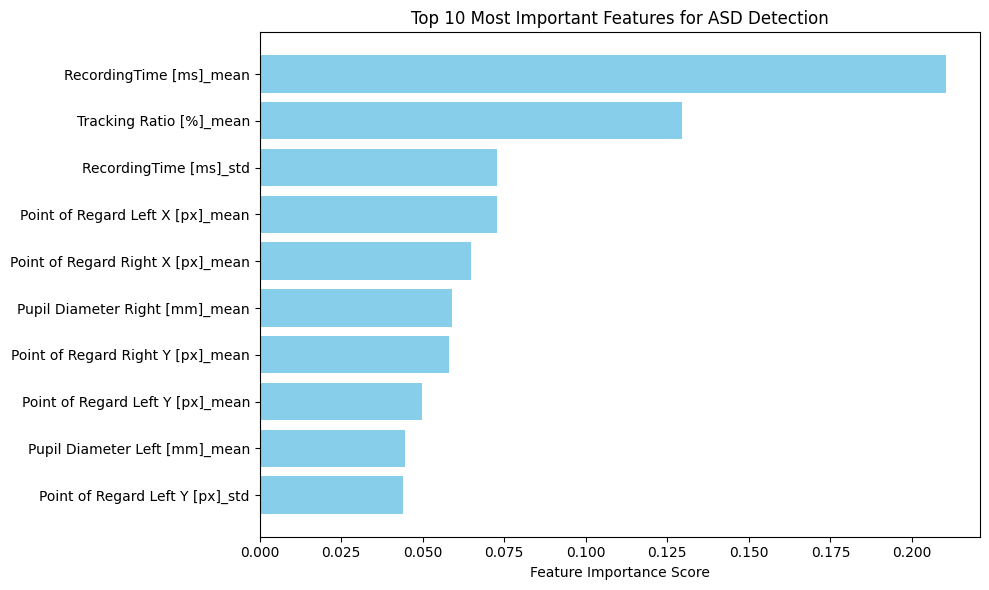

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))


plt.figure(figsize=(10, 6))
plt.barh(importance_df.head(10)['Feature'],
         importance_df.head(10)['Importance'],
         color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('Top 10 Most Important Features for ASD Detection')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ROC AUC: 0.9145


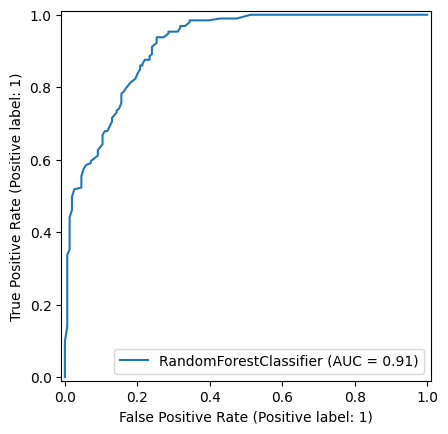

In [ ]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_val_prob = rf.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_prob)
print(f"ROC AUC: {roc_auc:.4f}")

RocCurveDisplay.from_estimator(rf, X_val, y_val)

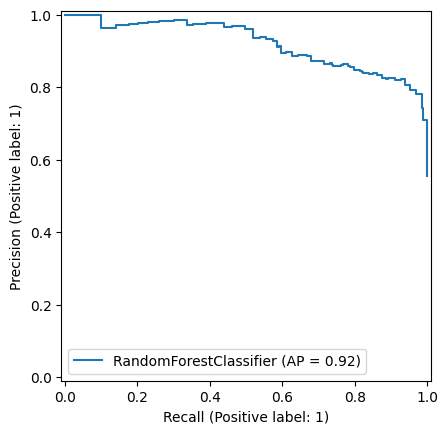

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(rf, X_val, y_val)

In [ ]:
from sklearn.metrics import log_loss

y_val_prob = rf.predict_proba(X_val)
logloss = log_loss(y_val, y_val_prob)
print(f"Log Loss: {logloss:.4f}")

Log Loss: 0.3721


In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_val, y_val_pred)
print(f"Cohen’s Kappa: {kappa:.4f}")

Cohen’s Kappa: 0.6284


In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Balanced Accuracy: 0.8158


In [ ]:
#accuracy of 0.7 on the validation dataset
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

print("Best F1-score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

y_val_pred = best_rf.predict(X_val)

print("Validation Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

y_test_pred = best_rf.predict(X_test)

print("\nTest Performance (Final Evaluation on Unseen Data):")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

joblib.dump(best_rf, 'best_rf_model.pkl')


""" Results
Validation Performance:
Accuracy: 0.8057
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       128
           1       0.77      0.85      0.81       119

    accuracy                           0.81       247
   macro avg       0.81      0.81      0.81       247
weighted avg       0.81      0.81      0.81       247

Confusion Matrix:
[[ 98  30]
 [ 18 101]]

Test Performance (Final Evaluation on Unseen Data):
Accuracy: 0.7003
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       179
           1       0.72      0.55      0.63       148

    accuracy                           0.70       327
   macro avg       0.70      0.69      0.69       327
weighted avg       0.70      0.70      0.69       327

Confusion Matrix:
[[147  32]
 [ 66  82]]
['best_rf_model.pkl']
"""

" Results\nValidation Performance:\nAccuracy: 0.8057\nClassification Report:\n              precision    recall  f1-score   support\n\n           0       0.84      0.77      0.80       128\n           1       0.77      0.85      0.81       119\n\n    accuracy                           0.81       247\n   macro avg       0.81      0.81      0.81       247\nweighted avg       0.81      0.81      0.81       247\n\nConfusion Matrix:\n[[ 98  30]\n [ 18 101]]\n\nTest Performance (Final Evaluation on Unseen Data):\nAccuracy: 0.7003\nClassification Report:\n              precision    recall  f1-score   support\n\n           0       0.69      0.82      0.75       179\n           1       0.72      0.55      0.63       148\n\n    accuracy                           0.70       327\n   macro avg       0.70      0.69      0.69       327\nweighted avg       0.70      0.70      0.69       327\n\nConfusion Matrix:\n[[147  32]\n [ 66  82]]\n['best_rf_model.pkl']\n"

## 📂 MLP Classifier

### Training

In [ ]:
X_train = X_train.dropna()
X_val = X_val.dropna()
X_test = X_test.dropna()

y_train = y_train[X_train.index]
y_val = y_val[X_val.index]
y_test = y_test[X_test.index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(300,150,100), max_iter=800, early_stopping=True,
                    validation_fraction=0.2, n_iter_no_change=15, random_state=42, alpha=0.001)

mlp.fit(X_train_scaled, y_train)

y_val_pred = mlp.predict(X_val_scaled)
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

y_test_pred = mlp.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

joblib.dump(mlp, 'mlp_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

Validation Accuracy: 0.7895
Test Accuracy: 0.7156
Test Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       179
           1       0.74      0.57      0.65       148

    accuracy                           0.72       327
   macro avg       0.72      0.70      0.70       327
weighted avg       0.72      0.72      0.71       327

Test Confusion Matrix:
[[149  30]
 [ 63  85]]


['scaler.pkl']

### **Evaluation**

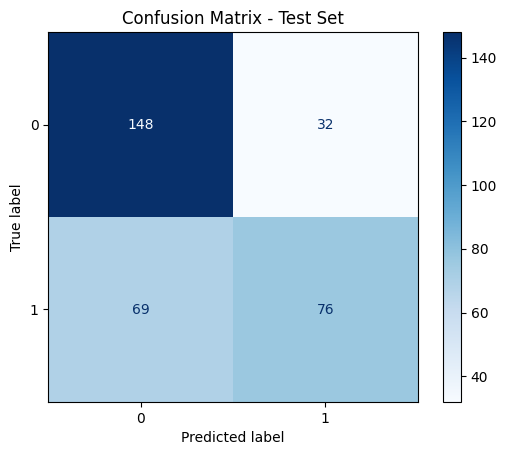

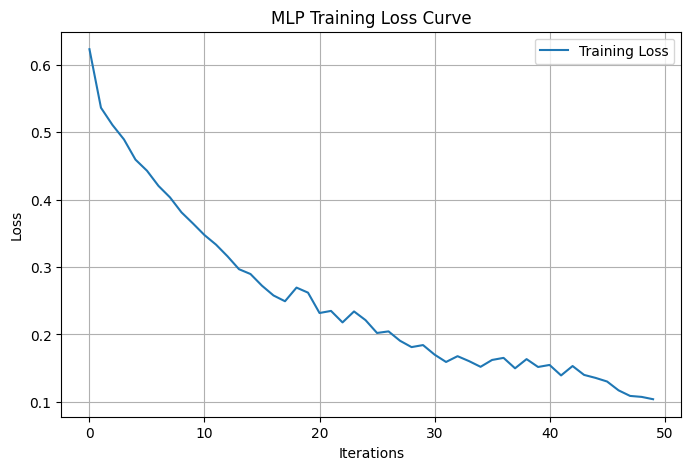

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Plot Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# 2. Plot Loss Curve
plt.figure(figsize=(8,5))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('MLP Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

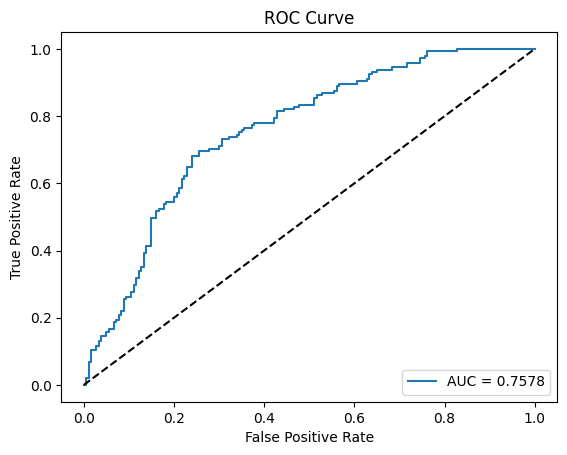

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for positive class
y_probs = mlp.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

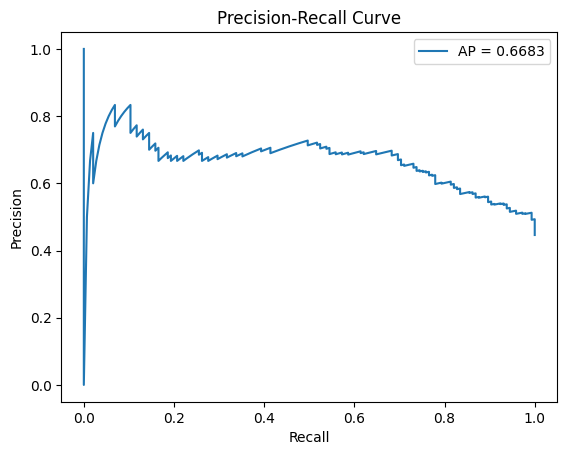

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure()
plt.plot(recall, precision, label=f'AP = {avg_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

## 🚀 **Streamlit app for MLP and RF**

In [ ]:
!ngrok add-authtoken 2yizdk1QFmHSwLwxJCxfDXDiVIr_5DFT5z2NfeW9xE3PDHESf

ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --url baz.ngrok.dev 8080                           # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --url mydomain.com                              # run ngrok with your own custom domain
  ngrok http 80 --cidr-allow 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions
  Upgrade your account at https://dash

In [ ]:
# STEP 1: Install dependencies
!pip install streamlit pyngrok joblib --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


UsageError: Line magic function `%%writefile` not found.


In [ ]:
# STEP 2: Write Streamlit app to a file
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

# Load models and scaler
rf_model = joblib.load('rf_model.pkl')
mlp_model = joblib.load('mlp_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define feature names based on your aggregation
feature_names = [
    'Pupil Diameter Right [mm]_mean',
    'Pupil Diameter Right [mm]_std',
    'Pupil Diameter Left [mm]_mean',
    'Pupil Diameter Left [mm]_std',
    'Tracking Ratio [%]_mean',
    'Point of Regard Right X [px]_mean',
    'Point of Regard Right X [px]_std',
    'Point of Regard Right Y [px]_mean',
    'Point of Regard Right Y [px]_std',
    'Point of Regard Left X [px]_mean',
    'Point of Regard Left X [px]_std',
    'Point of Regard Left Y [px]_mean',
    'Point of Regard Left Y [px]_std',
    'RecordingTime [ms]_mean',
    'RecordingTime [ms]_std'
]

# App Title
st.title("Pupil Data Classifier: Random Forest vs MLP")

# Instructions
st.write("Enter feature values below:")

# Sidebar inputs
input_data = []
for feature in feature_names:
    value = st.sidebar.number_input(f"{feature}:", value=0.0)
    input_data.append(value)

input_data = np.array(input_data).reshape(1, -1)

# Predict button
if st.button("Predict"):
    # Random Forest prediction
    rf_pred = rf_model.predict(input_data)[0]
    rf_proba = rf_model.predict_proba(input_data).max()

    # MLP prediction
    input_scaled = scaler.transform(input_data)
    mlp_pred = mlp_model.predict(input_scaled)[0]
    mlp_proba = mlp_model.predict_proba(input_scaled).max()

    # Results
    st.subheader("Random Forest Result")
    st.write(f"Predicted Class: {rf_pred}")
    st.write(f"Confidence: {rf_proba:.4f}")

    st.subheader("MLP Classifier Result")
    st.write(f"Predicted Class: {mlp_pred}")
    st.write(f"Confidence: {mlp_proba:.4f}")

# Footer
st.markdown("---")

Writing app.py


In [ ]:
!ngrok config add-authtoken 2yizdk1QFmHSwLwxJCxfDXDiVIr_5DFT5z2NfeW9xE3PDHESf

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Import pyngrok and start Streamlit
from pyngrok import ngrok

# Kill previous tunnels (optional)
!pkill streamlit

# Run the Streamlit app in the background
public_url = ngrok.connect(addr=8501)
print(f"Public URL: {public_url}")

# Start Streamlit
!streamlit run app.py &>/dev/null &

Public URL: NgrokTunnel: "https://2e83-34-32-175-101.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
eye_data_merged[['Point of Regard Right Y [px]', 'Point of Regard Right X [px]', 'Participant']].head(40)

,Point of Regard Right Y [px],Point of Regard Right X [px],Participant
0,NaN,NaN,50
1,375.6149,595.6325,50
2,375.7919,597.3023,50
3,378.2868,596.9685,50
4,378.5467,596.4349,50
5,379.7574,599.7004,50
6,378.1658,599.9091,50
7,379.4711,599.3040,50
8,379.8708,597.0591,50
9,382.3591,597.6764,50


In [ ]:
eye_data_merged.columns

Index(['Unnamed: 0', 'RecordingTime [ms]', 'Time of Day [h:m:s:ms]', 'Trial',
       'Stimulus', 'Export Start Trial Time [ms]',
       'Export End Trial Time [ms]', 'Participant', 'Color',
       'Tracking Ratio [%]', 'Category Group', 'Category Right',
       'Category Left', 'Index Right', 'Index Left',
       'Pupil Diameter Right [mm]', 'Pupil Diameter Left [mm]',
       'Point of Regard Right X [px]', 'Point of Regard Right Y [px]',
       'Point of Regard Left X [px]', 'Point of Regard Left Y [px]',
       'AOI Name Right', 'AOI Name Left', 'Gaze Vector Right X',
       'Gaze Vector Right Y', 'Gaze Vector Right Z', 'Gaze Vector Left X',
       'Gaze Vector Left Y', 'Gaze Vector Left Z', 'Annotation Name',
       'Annotation Description', 'Annotation Tags', 'Mouse Position X [px]',
       'Mouse Position Y [px]', 'Scroll Direction X', 'Scroll Direction Y',
       'Content', 'Pupil Size Right X [px]', 'Pupil Size Right Y [px]',
       'Pupil Size Left X [px]', 'Pupil Size Left Y [

In [ ]:
heatmap_files = [f for f in os.listdir(output_folder) if f.endswith('.npy')]
print(f"Number of heatmap files in folder: {len(heatmap_files)}")

Number of heatmap files in folder: 2372


In [ ]:
eye_data_merged['target'] = eye_data_merged['Class'].map({'ASD': 1, 'TD': 0})

In [ ]:
eye_data_merged['target'].dropna()

,target
0,0
1,0
2,0
3,0
4,0
...,...
1351152,1
1351153,1
1351154,1
1351155,1


## ⏲ TCN - Temporal Convolutional Network

### Calculating median sample intervals and sampling rate

In [ ]:
import numpy as np

eye_data_merged = eye_data_merged.sort_values('RecordingTime [ms]')

time_diffs = eye_data_merged['RecordingTime [ms]'].diff().dropna()

median_interval_ms = np.median(time_diffs)

print(f"Median sampling interval: {median_interval_ms:.2f} ms")

sampling_rate_hz = 1000 / median_interval_ms
print(f"Estimated sampling rate: {sampling_rate_hz:.2f} Hz")

Median sampling interval: 3.01 ms
Estimated sampling rate: 332.56 Hz


### Training

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, Input, metrics
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Parameters
SAMPLING_RATE = 333
WINDOW_LENGTH = SAMPLING_RATE * 1
STRIDE = SAMPLING_RATE // 2
FEATURE_COLUMNS = [
    'Pupil Diameter Right [mm]',
    'Pupil Diameter Left [mm]',
    'Point of Regard Right X [px]',
    'Point of Regard Right Y [px]',
    'Point of Regard Left X [px]',
    'Point of Regard Left Y [px]',
    'Tracking Ratio [%]'
]
TARGET_COLUMN = 'target'

eye_data_merged[FEATURE_COLUMNS] = (
    eye_data_merged.groupby('Trial')[FEATURE_COLUMNS]
    .apply(lambda grp: grp.interpolate())
    .reset_index(level=0, drop=True)
)
eye_data_merged[FEATURE_COLUMNS] = eye_data_merged[FEATURE_COLUMNS].fillna(method='bfill').fillna(method='ffill')

eye_data_merged = eye_data_merged.sort_values(['Trial', 'RecordingTime [ms]']).reset_index(drop=True)

scaler = StandardScaler()
eye_data_merged[FEATURE_COLUMNS] = scaler.fit_transform(eye_data_merged[FEATURE_COLUMNS])

def create_windows(data, window_length, stride, feature_cols, target_col):
    X = []
    y = []
    for trial_id, trial_df in data.groupby('Trial'):
        features = trial_df[feature_cols].values
        targets = trial_df[target_col].values
        for start in range(0, len(trial_df) - window_length + 1, stride):
            end = start + window_length
            window_features = features[start:end]
            window_target = targets[start:end]
            label = 1 if np.mean(window_target) > 0.5 else 0
            X.append(window_features)
            y.append(label)
    return np.array(X), np.array(y)

X, y = create_windows(eye_data_merged, WINDOW_LENGTH, STRIDE, FEATURE_COLUMNS, TARGET_COLUMN)
print(f"Created {X.shape[0]} windows of shape {X.shape[1:]}")

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval
)

def build_model(input_shape):
    model = models.Sequential([
        Input(shape=input_shape),
        layers.Conv1D(64, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv1D(128, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling1D(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model = build_model((WINDOW_LENGTH, len(FEATURE_COLUMNS)))
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', metrics.Precision(), metrics.Recall()]
)
model.summary()

/tmp/ipython-input-21-130874991.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  eye_data_merged[FEATURE_COLUMNS] = eye_data_merged[FEATURE_COLUMNS].fillna(method='bfill').fillna(method='ffill')


Created 8088 windows of shape (333, 7)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 333, 64)        │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 333, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 333, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 333, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,481 (205.00 KB)

 Trainable params: 52,097 (203.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

{0: np.float64(0.753650201926064), 1: np.float64(1.4856093080220454)}


In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop]
)

Epoch 1/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.6334 - loss: 0.6358 - precision_1: 0.4611 - recall_1: 0.6056 - val_accuracy: 0.7145 - val_loss: 0.6197 - val_precision_1: 0.5621 - val_recall_1: 0.6820
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.7252 - loss: 0.5720 - precision_1: 0.5707 - recall_1: 0.6734 - val_accuracy: 0.7651 - val_loss: 0.5507 - val_precision_1: 0.6376 - val_recall_1: 0.6985
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.7415 - loss: 0.5330 - precision_1: 0.6051 - recall_1: 0.7145 - val_accuracy: 0.7670 - val_loss: 0.5187 - val_precision_1: 0.6403 - val_recall_1: 0.7004
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.7620 - loss: 0.5158 - precision_1: 0.6339 - recall_1: 0.7210 - val_accuracy: 0.7701 - val_loss: 0.5101 - val_precision_1: 0.6453 - val_recall_1: 0.7022
Epoch 5/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - accuracy: 0.7759 - loss: 0.5001 - precision_1: 0.6485 - rec

51/51 - 1s - 23ms/step - accuracy: 0.8263 - loss: 0.3968 - precision_1: 0.7391 - recall_1: 0.7486
Test Loss: 0.3968
Test Accuracy: 0.8263
Test Precision: 0.7391
Test Recall: 0.7486


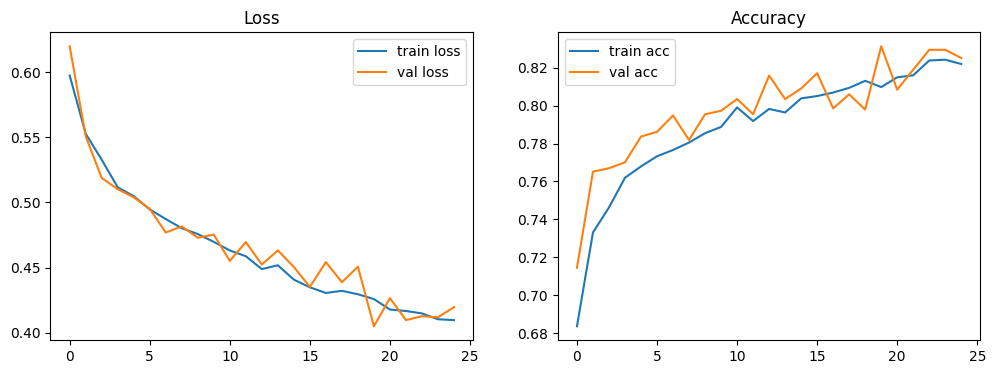

In [ ]:
test_loss, test_acc, test_prec, test_rec = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall: {test_rec:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

plt.show()

In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(3219), np.int64(1): np.int64(1633)}


In [ ]:
import pandas as pd
import numpy as np

WINDOW_LENGTH = 333
FEATURE_COLUMNS = [
    'Pupil Diameter Right [mm]',
    'Pupil Diameter Left [mm]',
    'Point of Regard Right X [px]',
    'Point of Regard Right Y [px]',
    'Point of Regard Left X [px]',
    'Point of Regard Left Y [px]',
    'Tracking Ratio [%]'
]

def generate_windows(df, window_length=WINDOW_LENGTH, feature_cols=FEATURE_COLUMNS):
    windows = []
    for trial_id, group in df.groupby('Trial'):
        group = group.sort_values('RecordingTime [ms]')
        features = group[feature_cols].values
        for start in range(0, len(features) - window_length + 1, window_length):
            window = features[start:start+window_length]
            if not np.isnan(window).any():
                windows.append(window)
    return np.array(windows)

if __name__ == "__main__":

    windows = generate_windows(eye_data_merged)

    print(f"Generated {len(windows)} windows of shape {windows[0].shape}")

    example_window_df = pd.DataFrame(windows[200], columns=FEATURE_COLUMNS)
    example_window_df.to_csv("example_window_200.csv", index=False)

Generated 1144 windows of shape (333, 7)


### 🔥Streamlit GUI for TCN

In [ ]:
app_code = """
import streamlit as st
import pandas as pd
import numpy as np
import joblib

FEATURE_COLUMNS = [
    'Pupil Diameter Right [mm]',
    'Pupil Diameter Left [mm]',
    'Point of Regard Right X [px]',
    'Point of Regard Right Y [px]',
    'Point of Regard Left X [px]',
    'Point of Regard Left Y [px]',
    'Tracking Ratio [%]'
]

WINDOW_LENGTH = 333  # must match model input window length

@st.cache(allow_output_mutation=True)
def get_model():
    from tensorflow.keras.models import load_model as keras_load_model
    try:
        model = keras_load_model("eye_tracking_tcn_model.h5")
        return model
    except Exception as e:
        st.error(f"Error loading model: {e}")
        return None

@st.cache(allow_output_mutation=True)
def load_scaler():
    try:
        return joblib.load("scaler.save")
    except Exception as e:
        st.error(f"Error loading scaler: {e}")
        return None

def preprocess_window(df, scaler):
    if list(df.columns) != FEATURE_COLUMNS:
        st.error(f"CSV columns do not match expected features.\\nExpected: {FEATURE_COLUMNS}\\nGot: {list(df.columns)}")
        return None
    if len(df) != WINDOW_LENGTH:
        st.error(f"CSV must have exactly {WINDOW_LENGTH} rows. Got {len(df)}")
        return None
    scaled = scaler.transform(df)
    return scaled[np.newaxis, :, :]

def main():
    st.title("Eye Tracking Window Classification Demo")

    st.markdown(
        f\"\"\"
        Upload a CSV file with exactly {WINDOW_LENGTH} rows and columns:
        {FEATURE_COLUMNS}
        \"\"\"
    )

    uploaded_file = st.file_uploader("Upload CSV file", type=["csv"])

    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        scaler = load_scaler()
        if scaler is None:
            return
        model = get_model()
        if model is None:
            return
        X = preprocess_window(df, scaler)
        if X is not None:
            pred_prob = model.predict(X)[0, 0]
            pred_label = int(pred_prob > 0.5)
            st.write(f"**Prediction probability:** {pred_prob:.4f}")
            st.write(f"**Predicted label:** {pred_label} (1 = positive class, 0 = negative class)")

if __name__ == "__main__":
    main()
"""

with open("app.py", "w") as f:
    f.write(app_code)

In [ ]:
from pyngrok import ngrok

ngrok.kill()
public_url = ngrok.connect(addr=8501)
print("Streamlit URL:", public_url)

get_ipython().system_raw('streamlit run app.py &')

Streamlit URL: NgrokTunnel: "https://bb36-34-32-175-101.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
import joblib

joblib.dump(scaler, "scaler.save")

['scaler.save']

In [ ]:
model.save('eye_tracking_tcn_model.h5')

In [ ]:
!pkill ngrok

## RNN with LSTM

### Training

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras import layers, models, Input, metrics, callbacks
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


SAMPLING_RATE = 333
WINDOW_LENGTH = SAMPLING_RATE * 1
STRIDE = SAMPLING_RATE // 3
FEATURE_COLUMNS = [
    'Pupil Diameter Right [mm]',
    'Pupil Diameter Left [mm]',
    'Point of Regard Right X [px]',
    'Point of Regard Right Y [px]',
    'Point of Regard Left X [px]',
    'Point of Regard Left Y [px]',
    'Tracking Ratio [%]'
]
TARGET_COLUMN = 'target'

def quick_preprocess(data):

    data[FEATURE_COLUMNS] = (
        data.groupby('Trial')[FEATURE_COLUMNS]
        .apply(lambda grp: grp.interpolate(method='linear'))
        .reset_index(level=0, drop=True)
    )

    data[FEATURE_COLUMNS] = data[FEATURE_COLUMNS].fillna(method='bfill').fillna(method='ffill')


    for col in FEATURE_COLUMNS:
        std_val = data[col].std()
        mean_val = data[col].mean()
        data[col] = np.clip(data[col], mean_val - 3*std_val, mean_val + 3*std_val)


    scaler = StandardScaler()
    data[FEATURE_COLUMNS] = scaler.fit_transform(data[FEATURE_COLUMNS])

    return data, scaler

def add_quick_features(data):

    data['Pupil_Avg'] = (data['Pupil Diameter Right [mm]'] + data['Pupil Diameter Left [mm]']) / 2
    data['Gaze_Center_X'] = (data['Point of Regard Right X [px]'] + data['Point of Regard Left X [px]']) / 2
    data['Gaze_Center_Y'] = (data['Point of Regard Right Y [px]'] + data['Point of Regard Left Y [px]']) / 2

    new_features = ['Pupil_Avg', 'Gaze_Center_X', 'Gaze_Center_Y']
    return data, FEATURE_COLUMNS + new_features

def create_improved_windows(data, window_length, stride, feature_cols, target_col):

    X, y = [], []

    for trial_id, trial_df in data.groupby('Trial'):
        features = trial_df[feature_cols].values
        targets = trial_df[target_col].values

        for start in range(0, len(trial_df) - window_length + 1, stride):
            end = start + window_length
            window_features = features[start:end]
            window_target = targets[start:end]


            label = 1 if np.median(window_target) > 0.5 else 0

            X.append(window_features)
            y.append(label)

    return np.array(X), np.array(y)

class FastAttention(tf.keras.layers.Layer):
    def __init__(self, units=64):
        super(FastAttention, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(
            name="attention_weight",
            shape=(input_shape[-1], self.units),
            initializer="glorot_uniform"
        )
        self.b = self.add_weight(
            name="attention_bias",
            shape=(self.units,),
            initializer="zeros"
        )
        self.u = self.add_weight(
            name="attention_context",
            shape=(self.units,),
            initializer="glorot_uniform"
        )

    def call(self, x):

        uit = tf.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        ait = tf.tensordot(uit, self.u, axes=1)
        ait = tf.nn.softmax(ait, axis=1)
        ait = tf.expand_dims(ait, axis=-1)
        weighted_input = x * ait
        return tf.reduce_sum(weighted_input, axis=1)


def build_fast_improved_model(input_shape):

    inputs = Input(shape=input_shape)

    x = layers.SpatialDropout1D(0.1)(inputs)

    x = layers.Bidirectional(
        layers.LSTM(64, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)
    )(x)

    x = FastAttention(units=32)(x)

    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.2)(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=Adam(learning_rate=2e-3),
        loss='binary_crossentropy',
        metrics=['accuracy', metrics.AUC()]
    )

    return model

def setup_fast_training():

    callbacks_list = [
        callbacks.EarlyStopping(
            monitor='val_loss',
            patience=7,
            restore_best_weights=True,
            verbose=1
        ),
        callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.3,
            patience=3,
            min_lr=1e-6,
            verbose=1
        )
    ]
    return callbacks_list

def improve_existing_model():

    class Attention(tf.keras.layers.Layer):
        def __init__(self):
            super(Attention, self).__init__()

        def build(self, input_shape):
            self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                     initializer="glorot_uniform")
            self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                     initializer="zeros")
            super().build(input_shape)

        def call(self, x):
            e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
            a = tf.keras.backend.softmax(e, axis=1)
            output = x * a
            return tf.keras.backend.sum(output, axis=1)


    def build_improved_existing_model(input_shape):
        inputs = Input(shape=input_shape)


        x = layers.SpatialDropout1D(0.1)(inputs)


        x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
        x = Attention()(x)


        x = layers.Dense(64, activation='relu')(x)
        x = layers.Dropout(0.2)(x)

        x = layers.Dense(32, activation='relu')(x)
        x = layers.Dropout(0.2)(x)

        outputs = layers.Dense(1, activation='sigmoid')(x)

        model = models.Model(inputs, outputs)


        model.compile(
            optimizer=Adam(learning_rate=2e-3, beta_1=0.9, beta_2=0.999),
            loss='binary_crossentropy',
            metrics=['accuracy', metrics.AUC()]
        )
        return model

    return build_improved_existing_model



eye_data_processed, scaler = quick_preprocess(eye_data_merged.copy())


eye_data_enhanced, enhanced_features = add_quick_features(eye_data_processed)


X, y = create_improved_windows(
    eye_data_enhanced, WINDOW_LENGTH, STRIDE, enhanced_features, TARGET_COLUMN
)


X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval
)


class_weights = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train
)
class_weights = dict(enumerate(class_weights))


model = build_fast_improved_model(input_shape=(X.shape[1], X.shape[2]))


callbacks_list = setup_fast_training()

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=128,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=callbacks_list,
    verbose=1,
)


/tmp/ipython-input-23-392858641.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[FEATURE_COLUMNS] = data[FEATURE_COLUMNS].fillna(method='bfill').fillna(method='ffill')


Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6801 - auc: 0.7178 - loss: 0.6178 - val_accuracy: 0.7407 - val_auc: 0.8048 - val_loss: 0.5202 - learning_rate: 0.0020
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 80s 961ms/step - accuracy: 0.7412 - auc: 0.7887 - loss: 0.5597 - val_accuracy: 0.7411 - val_auc: 0.8143 - val_loss: 0.5262 - learning_rate: 0.0020
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 83s 998ms/step - accuracy: 0.7275 - auc: 0.7915 - loss: 0.5524 - val_accuracy: 0.7601 - val_auc: 0.8143 - val_loss: 0.5133 - learning_rate: 0.0020
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 82s 1000ms/step - accuracy: 0.7380 - auc: 0.7993 - loss: 0.5498 - val_accuracy: 0.7531 - val_auc: 0.8276 - val_loss: 0.5196 - learning_rate: 0.0020
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 79s 954ms/step - accuracy: 0.7419 - auc: 0.8098 - loss: 0.5355 - val_accuracy: 0.7498 - val_auc: 0.8304 - val_loss: 0.5336 - learning_rate: 0.0020
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.7600 - auc:

### Evaluation

Starting comprehensive model evaluation...
COMPREHENSIVE MODEL EVALUATION

1. MAKING PREDICTIONS...

2. BASIC METRICS:
Test Accuracy: 0.8122
F1 Score: 0.7403
Test Samples: 2418
Positive Samples: 870 (36.0%)
Predicted Positive: 878 (36.3%)

3. DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

          TD       0.86      0.85      0.85      1548
         ASD       0.74      0.74      0.74       870

    accuracy                           0.81      2418
   macro avg       0.80      0.80      0.80      2418
weighted avg       0.81      0.81      0.81      2418


4. CONFUSION MATRIX:
[[1317  231]
 [ 223  647]]

5. GENERATING CURVES...


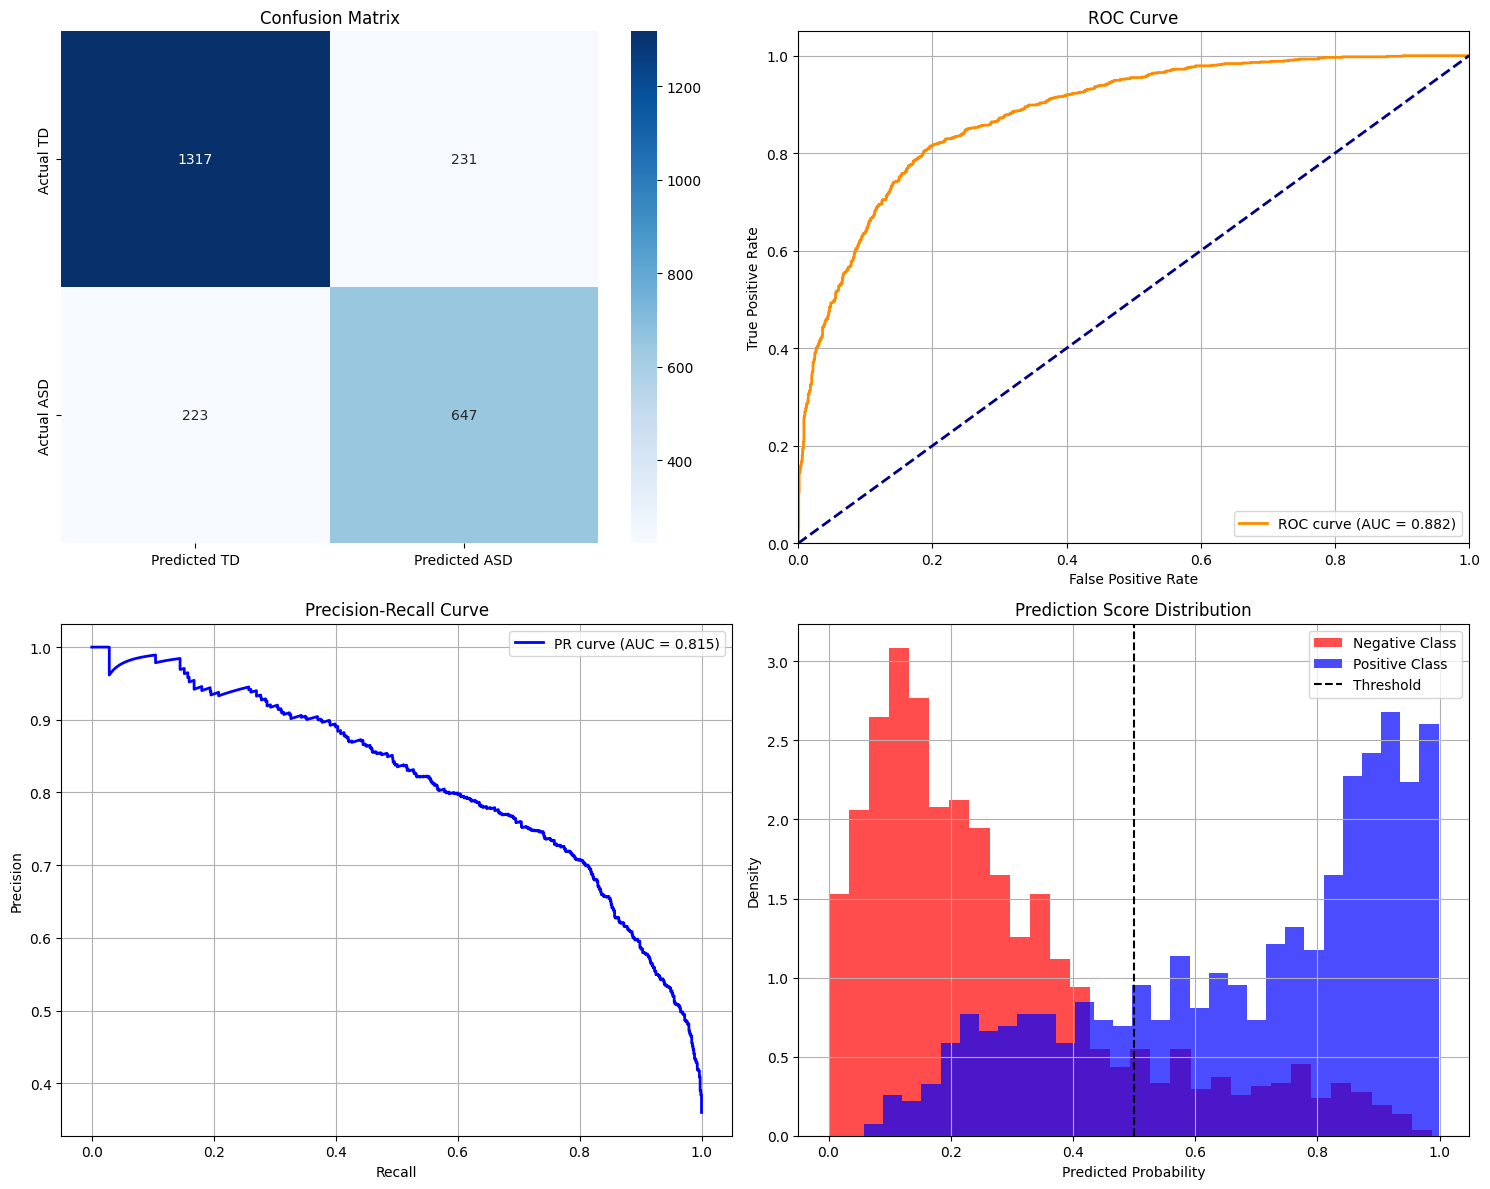


6. WINDOW-LEVEL ANALYSIS:
Total windows: 2418
Correct predictions: 1964 (81.2%)
High confidence correct: 1118 (46.2%)
Low confidence: 310 (12.8%)
Misclassified: 454 (18.8%)

Sample Predictions:
Index | True | Pred | Prob | Confidence
---------------------------------------------
 1366 |    1 |    0 | 0.205 | Low
 1233 |    0 |    0 | 0.051 | High
  906 |    0 |    0 | 0.209 | Low
 2244 |    0 |    0 | 0.168 | High
  110 |    0 |    0 | 0.085 | High
 1271 |    1 |    1 | 0.814 | High
  795 |    0 |    1 | 0.767 | Low
 1079 |    1 |    0 | 0.200 | Low
 1744 |    1 |    0 | 0.186 | High
 1310 |    0 |    0 | 0.010 | High

7. THRESHOLD ANALYSIS:
Best F1 Score: 0.7501 at threshold 0.45
Best Accuracy: 0.8122 at threshold 0.50


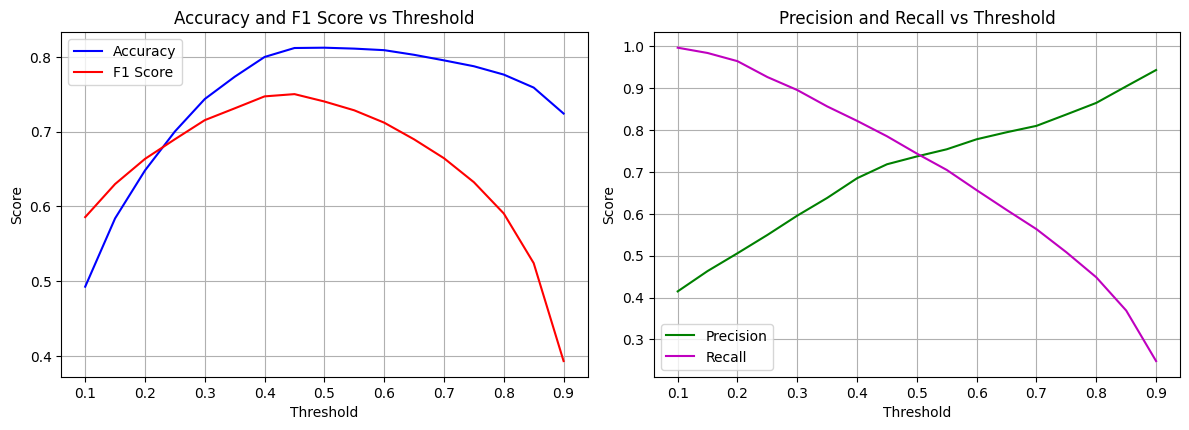


FINAL MODEL PERFORMANCE SUMMARY
Test Loss: 0.4258
Test Accuracy: 0.8122
Test AUC: 0.8820


Test F1 Score: 0.7403

PERFORMANCE INTERPRETATION:
🟡 Good performance

EVALUATION COMPLETE!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc,
    precision_recall_curve, f1_score, accuracy_score
)
from sklearn.model_selection import cross_val_score, StratifiedKFold
import tensorflow as tf

def comprehensive_model_evaluation(model, X_test, y_test, class_names=['TD', 'ASD']):

    print("="*60)
    print("COMPREHENSIVE MODEL EVALUATION")
    print("="*60)

    print("\n1. MAKING PREDICTIONS...")
    y_pred_proba = model.predict(X_test, verbose=0)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()
    y_pred_proba = y_pred_proba.flatten()

    print("\n2. BASIC METRICS:")
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Test Samples: {len(y_test)}")
    print(f"Positive Samples: {np.sum(y_test)} ({np.mean(y_test)*100:.1f}%)")
    print(f"Predicted Positive: {np.sum(y_pred)} ({np.mean(y_pred)*100:.1f}%)")

    print("\n3. DETAILED CLASSIFICATION REPORT:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    print("\n4. CONFUSION MATRIX:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    print("\n5. GENERATING CURVES...")

    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': cm
    }

def plot_evaluation_charts(y_test, y_pred, y_pred_proba, confusion_matrix):

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted TD', 'Predicted ASD'],
                yticklabels=['Actual TD', 'Actual ASD'],
                ax=axes[0,0])
    axes[0,0].set_title('Confusion Matrix')

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    axes[0,1].plot(fpr, tpr, color='darkorange', lw=2,
                   label=f'ROC curve (AUC = {roc_auc:.3f})')
    axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0,1].set_xlim([0.0, 1.0])
    axes[0,1].set_ylim([0.0, 1.05])
    axes[0,1].set_xlabel('False Positive Rate')
    axes[0,1].set_ylabel('True Positive Rate')
    axes[0,1].set_title('ROC Curve')
    axes[0,1].legend(loc="lower right")
    axes[0,1].grid(True)

    # 3. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    axes[1,0].plot(recall, precision, color='blue', lw=2,
                   label=f'PR curve (AUC = {pr_auc:.3f})')
    axes[1,0].set_xlabel('Recall')
    axes[1,0].set_ylabel('Precision')
    axes[1,0].set_title('Precision-Recall Curve')
    axes[1,0].legend()
    axes[1,0].grid(True)

    axes[1,1].hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7,
                   label='Negative Class', color='red', density=True)
    axes[1,1].hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7,
                   label='Positive Class', color='blue', density=True)
    axes[1,1].axvline(x=0.5, color='black', linestyle='--', label='Threshold')
    axes[1,1].set_xlabel('Predicted Probability')
    axes[1,1].set_ylabel('Density')
    axes[1,1].set_title('Prediction Score Distribution')
    axes[1,1].legend()
    axes[1,1].grid(True)

    plt.tight_layout()
    plt.show()

    return roc_auc, pr_auc

def analyze_predictions_by_window(model, X_test, y_test, sample_indices=None):

    print("\n6. WINDOW-LEVEL ANALYSIS:")

    y_pred_proba = model.predict(X_test, verbose=0).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    correct_predictions = (y_pred == y_test)
    high_confidence_correct = (correct_predictions) & ((y_pred_proba > 0.8) | (y_pred_proba < 0.2))
    low_confidence = (y_pred_proba > 0.4) & (y_pred_proba < 0.6)
    misclassified = ~correct_predictions

    print(f"Total windows: {len(y_test)}")
    print(f"Correct predictions: {np.sum(correct_predictions)} ({np.mean(correct_predictions)*100:.1f}%)")
    print(f"High confidence correct: {np.sum(high_confidence_correct)} ({np.mean(high_confidence_correct)*100:.1f}%)")
    print(f"Low confidence: {np.sum(low_confidence)} ({np.mean(low_confidence)*100:.1f}%)")
    print(f"Misclassified: {np.sum(misclassified)} ({np.mean(misclassified)*100:.1f}%)")

    if sample_indices is None:
        sample_indices = np.random.choice(len(y_test), min(10, len(y_test)), replace=False)

    print(f"\nSample Predictions:")
    print("Index | True | Pred | Prob | Confidence")
    print("-" * 45)
    for i in sample_indices:
        confidence = "High" if (y_pred_proba[i] > 0.8 or y_pred_proba[i] < 0.2) else "Low"
        print(f"{i:5d} | {y_test[i]:4d} | {y_pred[i]:4d} | {y_pred_proba[i]:.3f} | {confidence}")

def threshold_analysis(y_test, y_pred_proba):
    print("\n7. THRESHOLD ANALYSIS:")

    thresholds = np.arange(0.1, 0.95, 0.05)
    results = []

    for threshold in thresholds:
        y_pred_thresh = (y_pred_proba >= threshold).astype(int)
        accuracy = accuracy_score(y_test, y_pred_thresh)
        f1 = f1_score(y_test, y_pred_thresh)

        tp = np.sum((y_pred_thresh == 1) & (y_test == 1))
        fp = np.sum((y_pred_thresh == 1) & (y_test == 0))
        fn = np.sum((y_pred_thresh == 0) & (y_test == 1))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        results.append({
            'threshold': threshold,
            'accuracy': accuracy,
            'f1_score': f1,
            'precision': precision,
            'recall': recall
        })

    results_df = pd.DataFrame(results)

    # Find best thresholds
    best_f1_idx = results_df['f1_score'].idxmax()
    best_acc_idx = results_df['accuracy'].idxmax()

    print(f"Best F1 Score: {results_df.loc[best_f1_idx, 'f1_score']:.4f} at threshold {results_df.loc[best_f1_idx, 'threshold']:.2f}")
    print(f"Best Accuracy: {results_df.loc[best_acc_idx, 'accuracy']:.4f} at threshold {results_df.loc[best_acc_idx, 'threshold']:.2f}")

    # Plot threshold analysis
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(results_df['threshold'], results_df['accuracy'], 'b-', label='Accuracy')
    plt.plot(results_df['threshold'], results_df['f1_score'], 'r-', label='F1 Score')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Accuracy and F1 Score vs Threshold')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(results_df['threshold'], results_df['precision'], 'g-', label='Precision')
    plt.plot(results_df['threshold'], results_df['recall'], 'm-', label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision and Recall vs Threshold')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return results_df

def model_performance_summary(model, X_test, y_test):

    print("\n" + "="*60)
    print("FINAL MODEL PERFORMANCE SUMMARY")
    print("="*60)

    test_results = model.evaluate(X_test, y_test, verbose=0)
    test_loss = test_results[0]
    test_accuracy = test_results[1]
    test_auc = test_results[2] if len(test_results) > 2 else None

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    if test_auc:
        print(f"Test AUC: {test_auc:.4f}")

    y_pred_proba = model.predict(X_test, verbose=0).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)
    f1 = f1_score(y_test, y_pred)

    print(f"Test F1 Score: {f1:.4f}")

    print(f"\nPERFORMANCE INTERPRETATION:")
    if test_accuracy >= 0.85:
        print("🟢 Excellent performance!")
    elif test_accuracy >= 0.75:
        print("🟡 Good performance")
    elif test_accuracy >= 0.65:
        print("🟠 Moderate performance - consider improvements")
    else:
        print("🔴 Poor performance - needs significant improvement")

    return {
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'test_auc': test_auc,
        'test_f1': f1
    }

def run_complete_evaluation(model, X_test, y_test):

    print("Starting comprehensive model evaluation...")

    basic_results = comprehensive_model_evaluation(model, X_test, y_test)

    roc_auc, pr_auc = plot_evaluation_charts(
        y_test, basic_results['y_pred'],
        basic_results['y_pred_proba'], basic_results['confusion_matrix']
    )

    analyze_predictions_by_window(model, X_test, y_test)

    threshold_results = threshold_analysis(y_test, basic_results['y_pred_proba'])

    final_results = model_performance_summary(model, X_test, y_test)

    print("\n" + "="*60)
    print("EVALUATION COMPLETE!")
    print("="*60)

    return {
        'basic_results': basic_results,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'threshold_results': threshold_results,
        'final_results': final_results
    }

evaluation_results = run_complete_evaluation(model, X_test, y_test)

model.save('best_eye_tracking_model.h5')

### Streamlit app

In [ ]:
%%writefile eye_tracking_app.py
import streamlit as st
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer

class FastAttention(Layer):
    def __init__(self, units=64, **kwargs):
        super(FastAttention, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(name="attention_weight", shape=(input_shape[-1], self.units), initializer="glorot_uniform")
        self.b = self.add_weight(name="attention_bias", shape=(self.units,), initializer="zeros")
        self.u = self.add_weight(name="attention_context", shape=(self.units,), initializer="glorot_uniform")

    def call(self, x):
        uit = tf.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        ait = tf.tensordot(uit, self.u, axes=1)
        ait = tf.nn.softmax(ait, axis=1)
        ait = tf.expand_dims(ait, axis=-1)
        weighted_input = x * ait
        return tf.reduce_sum(weighted_input, axis=1)

model = load_model('best_eye_tracking_model.h5', custom_objects={'FastAttention': FastAttention})

st.title("👀 Eye-Tracking Autism Detection Classification")

st.markdown(
    """
    <div style="background-color:#FFF3CD; padding:10px; border-radius:5px; border:1px solid #FFEEBA; margin-bottom:20px;">
    <strong>Disclaimer:</strong> This is a student project created for educational purposes only.
    It is <em>not</em> intended to be a medical diagnosis or substitute for professional medical advice.
    Please consult a qualified healthcare professional for any medical concerns.
    </div>
    """,
    unsafe_allow_html=True
)

st.write("Upload a CSV file with the same structure as training data:")

uploaded_file = st.file_uploader("Choose a CSV file", type="csv")

if uploaded_file:
    data = pd.read_csv(uploaded_file)

    try:
        from sklearn.preprocessing import StandardScaler

        FEATURE_COLUMNS = [
            'Pupil Diameter Right [mm]',
            'Pupil Diameter Left [mm]',
            'Point of Regard Right X [px]',
            'Point of Regard Right Y [px]',
            'Point of Regard Left X [px]',
            'Point of Regard Left Y [px]',
            'Tracking Ratio [%]'
        ]

        data['Pupil_Avg'] = (data['Pupil Diameter Right [mm]'] + data['Pupil Diameter Left [mm]']) / 2
        data['Gaze_Center_X'] = (data['Point of Regard Right X [px]'] + data['Point of Regard Left X [px]']) / 2
        data['Gaze_Center_Y'] = (data['Point of Regard Right Y [px]'] + data['Point of Regard Left Y [px]']) / 2
        full_features = FEATURE_COLUMNS + ['Pupil_Avg', 'Gaze_Center_X', 'Gaze_Center_Y']

        scaler = StandardScaler()
        data[full_features] = scaler.fit_transform(data[full_features])

        # Create a single window with same shape as training data
        window = data[full_features].values[:model.input_shape[1]]
        if window.shape[0] < model.input_shape[1]:
            st.error("Not enough rows in file for one prediction window.")
        else:
            X_input = np.expand_dims(window, axis=0)
            prediction = model.predict(X_input)[0][0]
            st.success(f"Prediction: {'Pattern Suggests Autism-like Behavior' if prediction > 0.5 else 'Pattern Suggests Typical Behavior'} ({prediction:.2f})")

    except Exception as e:
        st.error(f"Error processing the file: {e}")

Overwriting eye_tracking_app.py


In [ ]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok

from google.colab import userdata

# Set your ngrok authtoken
ngrok.set_auth_token(userdata.get('AUTHOKEN'))

In [ ]:
!pkill pyngrok

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok
import time
import threading

# Start Streamlit in a thread
def run_streamlit():
    !streamlit run eye_tracking_app.py

thread = threading.Thread(target=run_streamlit)
thread.start()

ngrok.kill()

# Wait for Streamlit to start
time.sleep(5)

# Create public URL using ngrok
public_url = ngrok.connect(addr=8501)
print(f"🚀 Your app is live at: {public_url}")




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.125.250.217:8502

🚀 Your app is live at: NgrokTunnel: "https://974f-34-125-250-217.ngrok-free.app" -> "http://localhost:8501"
